<a href="https://colab.research.google.com/github/kaneelgit/ML-DL-Algorithms/blob/main/GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **GENERATIVE ADVERSERIAL NETWORKS**

In [ ]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import matplotlib.pyplot as plt
from IPython import display


In [ ]:
#function to display images
def plot_multiple_images(images, n_cols = None):

  """
  Visualize fake images
  """

  display.clear_output(wait=False)
  n_cols = n_cols or len(images)
  n_rows = (len(images) - 1) // n_cols + 1
  
  if images.shape[-1] == 1:
    images = np.squeeze(images, axis = -1)

  plt.figure(figsize = (n_cols, n_rows))

  for index, image in enumerate(images):
    plt.subplot(n_rows, n_cols, index + 1)
    plt.imshow(image, cmap = "binary")
    plt.axis("off")
  

In [ ]:
#downlood the MNIST dataset
(X_train, _), _ = keras.datasets.mnist.load_data()

#normalize
X_train = X_train.astype(np.float32) / 255

11490434/11490434 [==============================] - 2s 0us/step


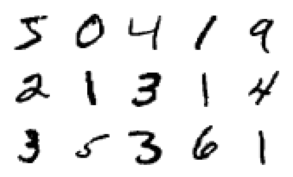

In [ ]:
#plot a couple of images
images = X_train[:15]
plot_multiple_images(images, n_cols = 5)

In [ ]:
BATCH_SIZE = 128

dataset = tf.data.Dataset.from_tensor_slices(X_train).shuffle(1000)
dataset = dataset.batch(BATCH_SIZE, drop_remainder = True).prefetch(1)

In [ ]:
#shape of the noise output
random_normal_dimensions = 32

generator = keras.models.Sequential([
    keras.layers.Dense(64, activation = "selu", input_shape = [random_normal_dimensions]),
    keras.layers.Dense(128, activation = "selu"),
    keras.layers.Dense(28 * 28, activation = "selu"),
    keras.layers.Reshape([28, 28])
])

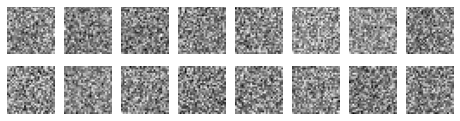

In [ ]:
#sample output of the generator
test_input = tf.random.normal([16, random_normal_dimensions])

#images
test_images = generator(test_input)

#visualize sample out
plot_multiple_images(test_images, n_cols = 8)

In [ ]:
#create the discriminator
discriminator = keras.models.Sequential([
    keras.layers.Flatten(input_shape = [28, 28]),
    keras.layers.Dense(128, activation = 'selu'),
    keras.layers.Dense(64, activation = 'selu'),
    keras.layers.Dense(1, activation = 'sigmoid')
])


gan = keras.models.Sequential([generator, discriminator])

In [ ]:
discriminator.compile(loss = "binary_crossentropy", optimizer = "rmsprop")
discriminator.trainable = False
gan.compile(loss = "binary_crossentropy", optimizer = "rmsprop")

In [ ]:
#train the model
def train_gan(gan, dataset, random_normal_dimensions, n_epochs = 50):

  generator, discriminator = gan.layers

  for epoch in range(n_epochs):
    print(f"Epoch {epoch + 1}/{n_epochs}")

    for real_images in dataset:
      batch_size = real_images.shape[0]

      noise = tf.random.normal(shape = [batch_size, random_normal_dimensions])

      fake_images = generator(noise)

      mixed_images = tf.concat([fake_images, real_images], axis = 0)

      discriminator_labels = tf.constant([[0.]] * batch_size + [[1.]] * batch_size)

      discriminator.trainable = True

      discriminator.train_on_batch(mixed_images, discriminator_labels)
      
      noise = tf.random.normal(shape = [batch_size, random_normal_dimensions])

      generator_labels = tf.constant([[1.]] * batch_size)

      discriminator.trainable = False

      gan.train_on_batch(noise, generator_labels)

    plot_multiple_images(fake_images, 8)
    plt.show()

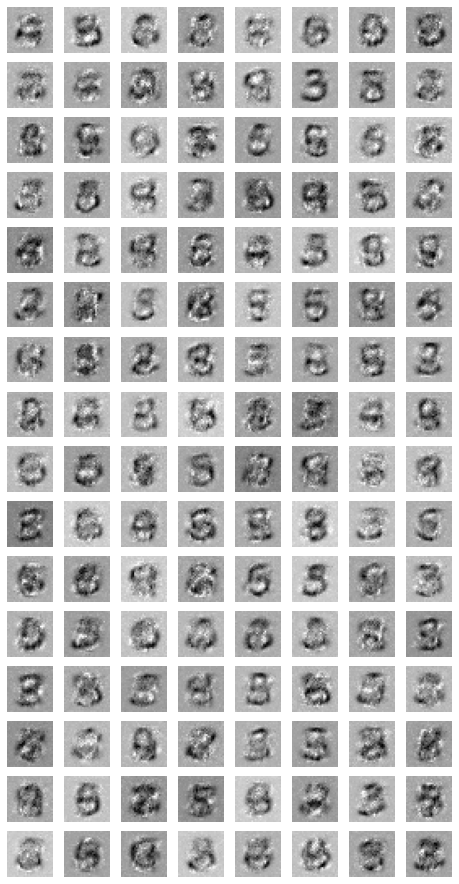

In [ ]:
train_gan(gan, dataset, random_normal_dimensions, n_epochs = 20)